In [147]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [180]:
df = pd.read_csv('C:/Users/vishal.sharma/Documents/New folder/data.csv')
df.head()

,product_name,brand_name,rating,rating_count,marked_price,discounted_price,sizes,product_link,img_link,product_tag,brand_tag,discount_amount,discount_percent
0,Croc Textured Two Fold Wallet,Lino Perros,0.0,0,1295,828,Onesize,wallets/lino-perros/lino-perros-women-peach-co...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",wallets,lino-perros,467,36
1,Men Striped Sliders,Mast & Harbour,4.0,76,1299,584,"UK6,UK7,UK8,UK9,UK10,UK11",flip-flops/mast--harbour/mast--harbour-men-nav...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",flip-flops,mast--harbour,715,55
2,Printed A-line Kurta,Biba,4.3,66,1999,1599,"S,M,L,XL,XXL,3XL",kurtas/biba/biba-women-off-white--black-printe...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",kurtas,biba,400,20
3,Girls Floral Printed T-shirt,Anthrilo,0.0,0,599,539,"7-8Y,8-9Y,9-10Y",tshirts/anthrilo/anthrilo-girls-white-floral-p...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",tshirts,anthrilo,60,10
4,Women Printed Kurta with Skirt,FASHION DWAR,0.0,0,2899,2899,"S,M,L,XL",kurta-sets/fashion-dwar/fashion-dwar-women-mul...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",kurta-sets,fashion-dwar,0,0


1. How many unique products are there in the dataset? (5 marks)

You need to find product ID of each product from product_link and then find the number of unique product ids

Finding Unique Products as per their Product ID
Removing Products with Duplicate Product ID

In [149]:
def extract_product_id(link):
    return link.split('/')[-2]
 


df['product_id'] = df['product_link'].apply(extract_product_id)
print(df['product_id']) 

# Count the number of unique product IDs
num_unique_product_ids = df['product_id'].nunique()

print(df['product_id'].nunique())


0         18070682
1         12548958
2         13446092
3         18017006
4         18015232
            ...   
168024    18245896
168025    18713222
168026    18713224
168027    18054182
168028    18511552
Name: product_id, Length: 168029, dtype: object
146435


In [150]:
print(num_unique_product_ids)

146435


In [151]:
df.drop_duplicates(subset=['product_id'], keep='first', inplace=True)

In [152]:
print(df)

                                             product_name      brand_name  \
0                           Croc Textured Two Fold Wallet     Lino Perros   
1                                     Men Striped Sliders  Mast & Harbour   
2                                    Printed A-line Kurta            Biba   
3                            Girls Floral Printed T-shirt        Anthrilo   
4                          Women Printed Kurta with Skirt    FASHION DWAR   
...                                                   ...             ...   
167987  Women Ethnic Motifs Printed Georgette Kaftan K...            ZOLA   
167988            Abstract Tie and Dye Printed Night Suit          Claura   
167989                                      Waisted Dress          Athena   
167990        Ready to Wear Lehenga & Blouse with Dupatta            Biba   
167991                           Solid Twill Seat Cushion             H&M   

        rating  rating_count  marked_price  discounted_price  \
0          

In [153]:
df[['product_name','product_id']]

,product_name,product_id
0,Croc Textured Two Fold Wallet,18070682
1,Men Striped Sliders,12548958
2,Printed A-line Kurta,13446092
3,Girls Floral Printed T-shirt,18017006
4,Women Printed Kurta with Skirt,18015232
...,...,...
167987,Women Ethnic Motifs Printed Georgette Kaftan K...,18297398
167988,Abstract Tie and Dye Printed Night Suit,17121206
167989,Waisted Dress,15227354
167990,Ready to Wear Lehenga & Blouse with Dupatta,14326862


2. What is the average rating of the products? (2 mark)
Try it without the product that are having rating 0


Try it without the product that are having 0 people given any rating

In [154]:
df[['rating','rating_count']]

,rating,rating_count
0,0.0,0
1,4.0,76
2,4.3,66
3,0.0,0
4,0.0,0
...,...,...
167987,0.0,0
167988,4.7,11
167989,4.1,8
167990,0.0,0


In [155]:
average_rating = df.loc[df['rating'] != 0,'rating'].mean()
print('average_rating without 0 rating',average_rating)

average_rating without 0 rating 4.167857186750868


In [156]:
average_rating = df.loc[df['rating_count'] != 0,'rating_count'].mean()
print('average_rating without 0 people',average_rating)

average_rating without 0 people 222.5561113500891


3. What is the average discount percentage of the products? (1 mark)

In [157]:
df['discount_percent']

0         36
1         55
2         20
3         10
4          0
          ..
167987    60
167988    61
167989    45
167990    50
167991     0
Name: discount_percent, Length: 146435, dtype: int64

In [158]:
average_discount = df.loc[df['discount_percent']!=0 ,'discount_percent'].mean()
print('average_discount',average_discount)

average_discount 45.096340199776186


4. What are the top 5 most expensive products? (2 marks)

Make sure that there can be multiple brands with same name so you can take brand ID also into considration

In [159]:
df_sorted = df.sort_values(by='discounted_price', ascending=False)

# select the top 5 most expensive products
top_5 = df_sorted.head(5)

# print the product names and prices of the top 5 most expensive products
for index, row in top_5.iterrows():
    print(row['product_name'],row ['discounted_price'])

Men Automatic Motion Watch 45900
Lord Krishna Showpiece 45599
Ready to Wear Lehenga Blouse With Dupatta 45000
Airwrap Complete Hair Styler 44900
Women Aviator Sunglasses 43900


In [160]:
df=df.sort_values('discounted_price',ascending=False)
df.head(5)

,product_name,brand_name,rating,rating_count,marked_price,discounted_price,sizes,product_link,img_link,product_tag,brand_tag,discount_amount,discount_percent,product_id
29599,Men Automatic Motion Watch,D1 Milano,0.0,0,51000,45900,Onesize,watches/d1-milano/d1-milano-men-black-skeleton...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",watches,d1-milano,5100,10,16365590
27039,Lord Krishna Showpiece,eCraftIndia,0.0,0,113999,45599,Onesize,showpieces/ecraftindia/ecraftindia-gold-toned-...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",showpieces,ecraftindia,68400,60,15890266
65674,Ready to Wear Lehenga Blouse With Dupatta,Masaba,0.0,0,45000,45000,"XS,S,M,L,XL",lehenga-choli/masaba/masaba-lavender--green-pr...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",lehenga-choli,masaba,0,0,16872364
107767,Airwrap Complete Hair Styler,dyson,4.7,91,44900,44900,Onesize,hair-appliance/dyson/dyson-airwrap-complete-ha...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",hair-appliance,dyson,0,0,12107582
77688,Women Aviator Sunglasses,Tom Ford,0.0,0,43900,43900,L,sunglasses/tom-ford/tom-ford-women-grey-lens--...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",sunglasses,tom-ford,0,0,15445218


5. What are the top 10 brands by the number of products in the dataset? (2 mark)

In [161]:
brand_counts = df.groupby('brand_name')['product_name'].count()
sorted_brands = brand_counts.sort_values(ascending=False)
top_10 = sorted_brands.head(10)
print(top_10)

brand_name
Roadster                 4557
Mast & Harbour           2397
DressBerry               2073
H&M                      1998
Anouk                    1784
max                      1772
HRX by Hrithik Roshan    1734
Puma                     1667
MANGO                    1625
HERE&NOW                 1612
Name: product_name, dtype: int64


6. List top 5 brands with maxiumum average rating of products? (2 marks)

Neglect the products which are not reviewed by any person

In [162]:

df = df.dropna()

# group the dataframe by brand and calculate the mean rating per brand
brand_ratings = df.groupby('brand_tag')['rating'].mean()

# sort the brands by mean rating in descending order
sorted_brands = brand_ratings.sort_values(ascending=False)

# select the top 5 brands by mean rating
top_5 = sorted_brands.head(5)

# print the top 5 brands and their corresponding mean ratings
print(top_5)

brand_tag
1-stop-fashion               5.0
pro-ethic-style-developer    5.0
beauty-glazed                5.0
mildcares                    5.0
joseph-joseph                5.0
Name: rating, dtype: float64


7. Plot a histogram of the distribution of ratings of following brand. (3 marks)

H&M

max

Puma

MANGO

Neglect the products which are not reviewed by any person

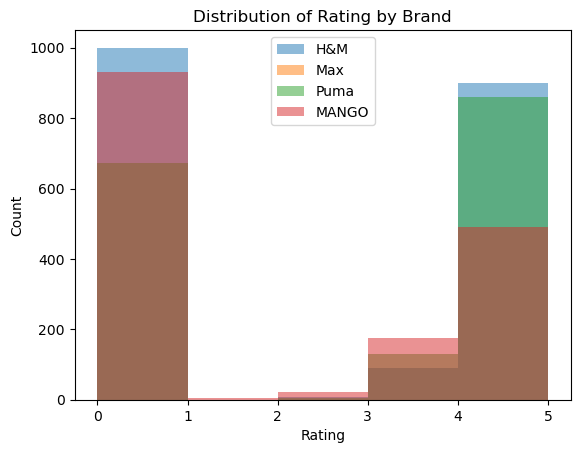

In [163]:
brands_to_plot = ['H&M', 'Max', 'Puma', 'MANGO']

# subset the dataframe to include only the selected brands
df_to_plot = df[df['brand_name'].isin(brands_to_plot)]

# plot a histogram of the distribution of ratings for each brand
for brand in brands_to_plot:
    brand_ratings = df_to_plot[df_to_plot['brand_name'] == brand]['rating']
    plt.hist(brand_ratings, bins=5, alpha=0.5, label=brand)

# add labels and legend to the plot
plt.title('Distribution of Rating by Brand')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.legend()

# display the plot
plt.show()

8. What is the distribution of discounts by brand for specific brands mentioned below?(2 marks)

H&M

max

Puma

MANGO

Neglect the products which are not reviewed by any person. Neglect the products which are not on any discount.

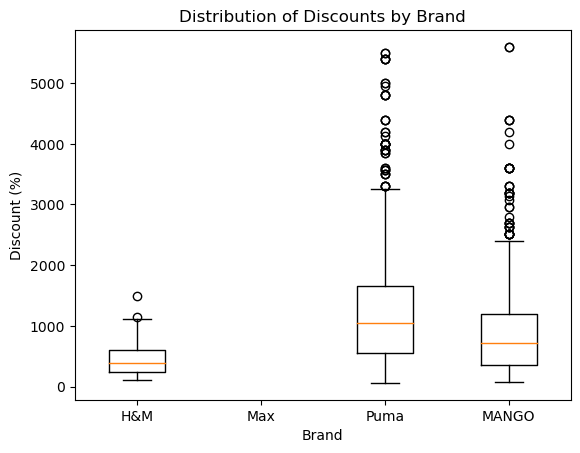

In [164]:
brands_to_plot = ['H&M', 'Max', 'Puma', 'MANGO']

# subset the dataframe to include only the selected brands and products with a discount
df_to_plot = df[(df['brand_name'].isin(brands_to_plot)) & (df['discount_amount'] > 0)]

# create a box plot of the distribution of discounts by brand
plt.boxplot([df_to_plot[df_to_plot['brand_name'] == brand]['discount_amount'] for brand in brands_to_plot])

# add labels and legend to the plot
plt.title('Distribution of Discounts by Brand')
plt.xlabel('Brand')
plt.ylabel('Discount (%)')
plt.xticks([1, 2, 3, 4], brands_to_plot)

# display the plot
plt.show()

9. Is there any trend or pattern you can find between discount percent and rating of the product? (3 marks)

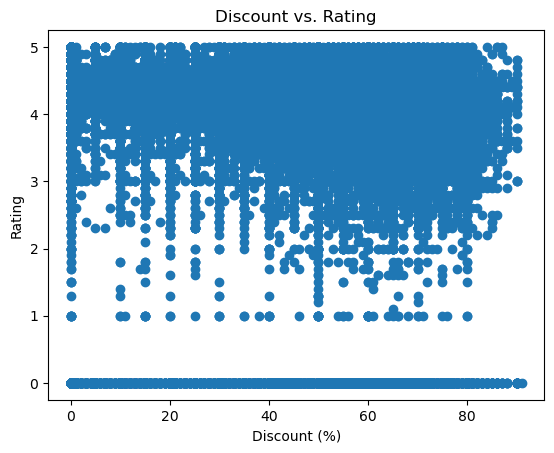

In [165]:
plt.scatter(df['discount_percent'], df['rating'])

# add labels and legend to the plot
plt.title('Discount vs. Rating')
plt.xlabel('Discount (%)')
plt.ylabel('Rating')

# display the plot
plt.show()

10. What are the top 10 most popular tags in the dataset? (2 marks)

In [166]:

import pandas as pd
from collections import Counter


# create a list of all tags in the dataset
all_tags = []
for tags in df['brand_tag']:
    all_tags += tags.split(',')

# count the frequency of each tag using a Counter
tag_counts = Counter(all_tags)

# sort the tags by their frequency in descending order
sorted_tags = sorted(tag_counts.items(), key=lambda x: x[1], reverse=True)

# extract the top 10 most frequent tags from the sorted list
top_tags = sorted_tags[:10]

# print the top 10 most frequent tags
for tag, count in top_tags:
    print(tag)

roadster
mast--harbour
dressberry
hm
anouk
max
hrx-by-hrithik-roshan
puma
mango
herenow


In [171]:
Rating=df.loc[df['rating']!=0]
Rating_view=df.loc[df['rating_count']!=0]

11. Are there any relations between the rating and number of people who rated the products? (4 marks)

Neglect the products that are not reviewed by any person

Neglect the products that are having zero rating

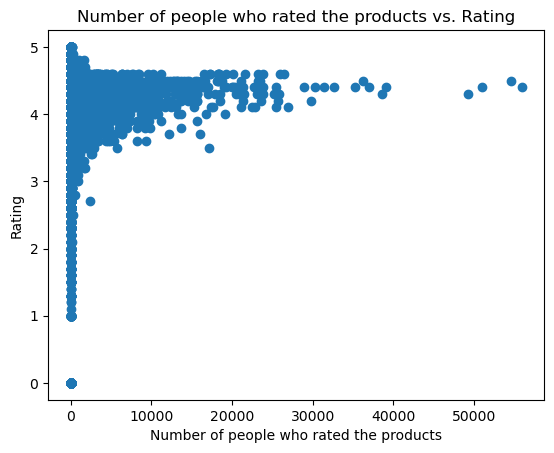

In [179]:


plt.scatter(df['rating_count'], df['rating'])

# add labels and legend to the plot
plt.title('Number of people who rated the products vs. Rating')
plt.xlabel('Number of people who rated the products')
plt.ylabel('Rating')

# display the plot
plt.show()

12. What are the top 10 Most Expensive brands? (3 marks)

Use marked price as the reference to find the most expensive brand

In [181]:
brand_prices = df.groupby('brand_name')['marked_price'].mean()

# Sort the brands based on their mean marked price in descending order
sorted_brands = brand_prices.sort_values(ascending=False)

# Select the top 10 brands based on their mean marked price
top_10_brands = sorted_brands[:10]

# Print the top 10 most expensive brands
print(top_10_brands)

brand_name
EARNSHAW                 47603.846154
Victorinox               44000.000000
MOSCHINO COUTURE         40000.000000
dyson                    39233.333333
Tom Ford                 38800.000000
Valuchi                  38050.000000
Bottega Veneta           34490.000000
Versace Jeans Couture    33125.000000
TISSOT                   31928.571429
DUCATI CORSE             31665.666667
Name: marked_price, dtype: float64


13. What are the top 10 Most Expensive Product Category? (4 marks)

Use marked price as the reference to find the most expensive brand

In [183]:
category_prices = df.groupby('product_name')['marked_price'].mean()

# Sort the categories based on their mean marked price in descending order
sorted_categories = category_prices.sort_values(ascending=False)

# Select the top 10 categories based on their mean marked price
top_10_categories = sorted_categories[:10]

# Print the top 10 most expensive product categories
print(top_10_categories)

product_name
Lord Krishna Showpiece                                              113999.000000
Durga Maa On Lion Showpiece                                          71999.000000
Men Stainless Steel Straps Multi Function Automatic Motion Watch     57200.000000
Men Stainless Steel Straps Automatic Motion Watch                    46077.222222
Men Leather Straps Multi Function Automatic Motion Watch             45825.000000
Airwrap Complete Hair Styler                                         44900.000000
Men Brass Dial & Automatic Watch                                     44500.000000
Mid-Rise Stretchable Jeans                                           41000.000000
Printed Carpets                                                      40350.000000
Men Regular Fit Cotton Jeans                                         39000.000000
Name: marked_price, dtype: float64


14. Analyse the Violen Plot of watches of following brands mentioned below ? (5 marks)

Take Marked Price for Reference
Take product_tag as watches
Take brand_tag as tommy-hilfiger, daniel-wellington, armani-exchange, emporio-armani, earnshaw, tissot
Make sure to write your inference based on the violen plot of following watch brands price

<AxesSubplot:xlabel='brand_tag', ylabel='marked_price'>

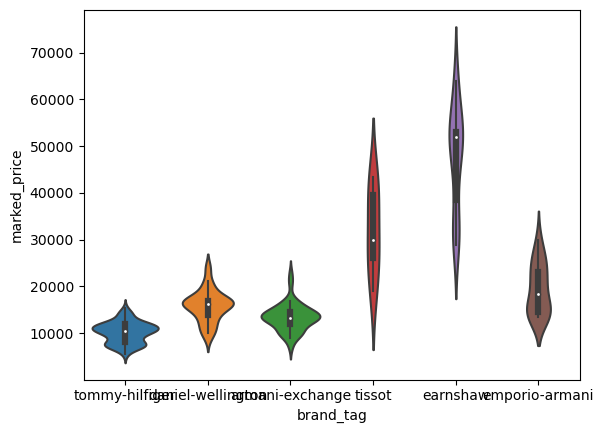

In [184]:
watch_brands = ["tommy-hilfiger", "daniel-wellington", "armani-exchange", "emporio-armani", "earnshaw", "tissot"]
watch_data = df.loc[(df["product_tag"] == "watches") & (df["brand_tag"].isin(watch_brands)), ["brand_tag", "marked_price"]]

# Create a Violin plot to visualize the distribution of marked_price for each of these brands
sns.violinplot(x="brand_tag", y="marked_price", data=watch_data)


15. List top 5 brands which are having most wide range or products

Use marked price as the reference

In [189]:
brand_ranges = df.groupby('brand_tag')['marked_price'].apply(lambda x: x.max() - x.min())

# Sort the brand_ranges in descending order and take the top 5 brands
top_brands = brand_ranges.sort_values(ascending=False).head(5)

# Print the top 5 brands with their range of marked_price
print(top_brands)

brand_tag
ecraftindia     113400
ddecor           39651
calvin-klein     39360
d1-milano        38500
masaba           37001
Name: marked_price, dtype: int64
